# Intro

Hello! This is quick little notebook that will get you acquainted with large language models. This notebook is split up into three parts:

1. Download an LLM
2. Logits of an LLM

But first, we need access to a GPU. To do that, follow these steps:
1. Click "Runtime" on the menu on the top left corner of your screen.
2. Click "Change runtime type"
3. Under "Hardware accelerator" click "T4 GPU" and then click "Save"

Bam -- now you have access to a [T4 GPU](https://www.nvidia.com/en-us/data-center/tesla-t4/)! Pretty easy.

Now, let's dive into things.

# Install Packages

Install the packages below. If there is an issue with installing these packages, try simply running the cell again. I've found that this often resolves my issues.

In [ ]:
# Install packages
!pip install transformers peft accelerate optimum datasets==2.15.0
!pip install auto-gptq --extra-index-url https://huggingface.github.io/autogptq-index/whl/cu117/
!pip install -U bitsandbytes sentencepiece protobuf flash-attn
!pip install -U huggingface_hub[hf_transfer]==0.22.2
!export HF_HUB_ENABLE_HF_TRANSFER=1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.3/297.3 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.9/409.9 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 710.0 kB/s eta 0:00:00
     ━━━━━━━━━

# Download an LLM

In the first part of this notebook, we will explore [GPT2](https://huggingface.co/openai-community/gpt2), a large language model released by OpenAI in 2019.

In 2019, GPT2 sent the internet abuzz. OpenAI initially withheld releasing the full model out of fear it would be used to spread fake news, spam, and disinformation. Yet they eventually released it. Little did we know how much wilder things would get...

OpenAI spent the next five years building larger and better versions of this model, continually improving their technology until they eventually created GPT4, the model which powers [chatgpt](https://openai.com/chatgpt) and has taken the world by storm.

Although state of the art in 2019, GPT2 is pretty easy to access today. The model is hosted on [HuggingFace](https://huggingface.co/), a leading company for open source AI. HuggingFace has thousands of cutting-edge AI models on its website that anyone can download and use for free. I encourage you to try playing with some of the models on HuggingFace on your own in your free time, after class -- it is pretty cool!

Today we will download GPT2 and get acquainted with how to use it.

In [ ]:
# HuggingFace built the transformers library
from transformers import GPT2Tokenizer, GPT2LMHeadModel

# Meta built the torch library
import torch

In [ ]:
# Load GPT2
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = GPT2LMHeadModel.from_pretrained("openai-community/gpt2").to(device)

# Put the model in eval mode because we are not training it
model.eval()

# This is what the model "architecture" looks like
model

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

To see the actual "weights" of GPT2, we can iterate over each layer of the neural network and see the weights at every layer

In [ ]:
for layer_name, layer_weights in model.state_dict().items():
  print("-"*30, layer_name, "-"*30)
  print("The weights of this layer are a matrix/vector with dimensions:", layer_weights.shape, end="\n\n")
  print(layer_weights)

Streaming output truncated to the last 5000 lines.
        0.4986, 0.2761, 0.2627, 0.2686, 0.2555, 0.2625, 0.2564, 0.2705, 0.2529,
        0.2529, 0.2647, 0.2666, 0.2705, 0.2448, 0.2547, 0.2644, 0.2629, 0.2725,
        0.2549, 0.2510, 0.2410, 0.2588, 0.2901, 0.2979, 0.2861, 0.2523, 0.1863,
        0.2725, 0.2626, 0.2666, 0.2685, 0.2626, 0.2387, 0.2378, 0.2639, 0.2606,
        0.2549, 0.2746, 0.3213, 0.2666, 0.2584, 0.2627, 0.2495, 0.2627, 0.2744,
        0.2568, 0.2756, 0.2919, 0.2821, 0.2495, 0.2898, 0.2330, 0.2725, 0.2607,
        0.2665, 0.2685, 0.2783, 0.2730, 0.3037, 0.2589, 0.2666, 0.2525, 0.2567,
        0.1489, 0.2438, 0.2621, 0.2516, 0.2524, 0.2542, 0.2627, 0.2627, 0.2685,
        0.2588, 0.2354, 0.2447, 0.2686, 0.2545, 0.2494, 0.2646, 0.2658, 0.2724,
        0.2739, 0.2498, 0.2425, 0.2487, 0.1271, 0.2573, 0.2626, 0.2601, 0.2475,
        0.2813, 0.2666, 0.2426, 0.2568, 0.2572, 0.2578, 0.2568, 0.2217, 0.2723,
        0.2725, 0.2665, 0.2510, 0.2610, 0.2495, 0.2607, 0.3620, 0.266

Q0: Looking at the weights of GPT2, is it what you expected a cutting edge AI model to look like (as of 2019)? Did you think there would be more or fewer numbers in the model?

A0: \<write-answer-here>

Now let's load GPT2's tokenizer.

A tokenizer is in charge of preparing the inputs for a model.

Also, a token is a word or subword.

In [ ]:
# Load GPT's tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('openai-community/gpt2')
tokenizer

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

GPT2Tokenizer(name_or_path='openai-community/gpt2', vocab_size=50257, model_max_length=1024, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	50256: AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
}

A tokenizer can encode and decode text.

**Encode:**
Encoding means to split the text up into words or subwords and then convert each token to a unique integer id.
<!--
<div>
<img src="https://drive.google.com/uc?export=view&id=1Xr1LvvGIXs1cJjV7Gl8JXCWDb7wB_pks" width="500"/>
</div> -->

**Decode:**
Decoding means converting a token's id back to the original word or subword.

<!-- <div>
<img src="https://drive.google.com/uc?export=view&id=1_EX4GhnUFkbYUod5PCNOn7k5k4eAavVa" width="500"/>
</div> -->


Let's try it.

In [ ]:
# Encode the text
text = "Hi there."
input_ids = tokenizer.encode(text)
input_ids

[17250, 612, 13]

The tokenizer split up "Hi there." into three tokens which have the ids 17250, 612, 13.

In [ ]:
# Decode the text
tokenizer.decode([17250])

'Hi'

The id 17250 refers to the word "Hi".


Q1: Can you write code to decode the other token ids we see above (612, 13)?

Q2: Our sentence above has two words ("Hi there.") but is converted to three tokens. Why is it converted to three tokens instead of two?

In [ ]:
# Write code for answer here


A1: \<write-answer-here>

A2: \<write-answer-here>

Q3: Does "hi" have the same token id as "Hi"? Before writing any code, do you expect these two to have the same token id? Why does/doesn't this make sense?

A3: \<write-answer-here>

In [ ]:
# Write code for answer here


Great, we have the GPT2 model `model` and the GPT tokenizer `tokenizer`.

Now let's use the two of these together to generate text!

In [ ]:
# Our input text
input_text = "The meaning of life is"

# Encode the text
input_ids = tokenizer.encode(input_text, return_tensors='pt').to(device)

# Pass the encoded text into the model and generate text
outputs = model.generate(input_ids, max_length=15)

# Decode the text
generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

generated_text

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


'The meaning of life is not the same as the meaning of death.\n'

In [ ]:
print(f"Input text: '{input_text}'", end="\n\n")
print(f"Encoded text: {input_ids}", end="\n\n")
print(f"Encoded generated-text: {outputs}", end="\n\n")
print(f"Decoded generated-text: '{generated_text}'", end="\n\n")

Q4: How many new token ids did the model generate? How many new words did the model generate? Are these two numbers the same? Why does/doesn't that make sense?

A4: \<write-answer-here>

# Logits


There's a common misconception that LLMs directly produce text. This is not true.

LLMs work by predicting which token is most likely to come next in a sentence. By simply predicting the next token, you get a model that you can chat with, that can help you to code, or a model that can summerize a book for you. Predicting the next token is such a fundamental task that learning which token comes next in a sentence gives a model of these abilities.

In this section, we'll explore logits, the key to predicting the next token in a sentence.

But first, let's start off by looking at an example.

In [ ]:
input_text = "I have a dream"

# Tokenize the text
input_tokens = tokenizer(input_text, return_tensors='pt').to(device)
n_input_tokens = len(input_tokens["input_ids"].squeeze())

# Generate text
output_tokens = model.generate(
    **input_tokens,
    max_length=n_input_tokens+5,
    pad_token_id=tokenizer.eos_token_id,
    )

# Decode the text
output_text = tokenizer.decode(output_tokens[0], skip_special_tokens=True)
print(f"Generated text: {output_text}")

Generated text: I have a dream of being a doctor.


The sentence “I have a dream of being a doctor” appears to have been generated by GPT-2. However, GPT-2 didn't exactly produce this sentence.

There's a common misconception that LLMs like GPT-2 directly produce text. This isn't the case. Instead, LLMs calculate logits, which are scores assigned to every possible token in their vocabulary.

We can actually visualize this.

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
def get_log_prob(text, model, top_k=10):

  # Tokenize the input text
  input_ids = tokenizer.encode(text, return_tensors='pt').to(device)

  # Predict the next token
  with torch.no_grad():
    outputs = model(input_ids)
    predictions = outputs.logits

  # Extract logits for the last token and convert to probabilities
  last_token_logits = predictions[0, -1, :]
  probabilities = torch.nn.functional.softmax(last_token_logits, dim=-1)

  # Get the top k most likely next words
  top_k_probs, top_k_token_ids = torch.topk(probabilities, top_k)
  top_k_probs = top_k_probs.tolist()
  top_k_tokens = [tokenizer.decode([idx]) for idx in top_k_token_ids.tolist()]

  return top_k_tokens, top_k_probs

In [ ]:
def plot_next_token_distribution(top_k_tokens, top_k_probs, input_text, top_k):

  df = pd.DataFrame({"Token": top_k_tokens, "Probability": top_k_probs})
  ax = sns.barplot(df, x="Token", y="Probability", hue="Probability", palette="Blues")

  title = f"The {top_k} most likely tokens to come after the sentence\n'{input_text}'"
  ax.set_title(title)
  return ax

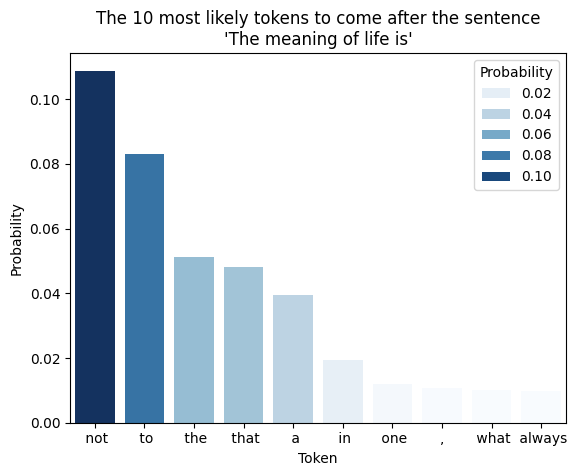

In [ ]:
input_text = "I have a dream "
top_k = 10

top_k_tokens, top_k_probs = get_log_prob(input_text, model, top_k=top_k)
ax = plot_next_token_distribution(top_k_tokens, top_k_probs, input_text, top_k)

Here, the model assigns a probability of ~12% to the token “not” being the next token after “I have a dream”. More formally, we denote this probability as $P(\text{of} | \text{I have a dream}) = 0.12$.

This is interesting. The LLM is really modeling the probability of each token. coming next in the sentence.

Let's say we do indeed sleect "not" as our next word. We now have the sentence “I have a dream not”. Let's put this into the LLM and see what comes out:


In [ ]:
input_text = "I have a dream not"
top_k = 10

top_k_tokens, top_k_probs = get_log_prob(input_text, model, top_k=top_k)
ax = plot_next_token_distribution(top_k_tokens, top_k_probs, input_text, top_k)

Great, this outputted another token!

We can keep on selecting the most probable token and adding that to our sentence. This how an LLM actually generates text!

Q5: Please write a function `generate` that takes in `input_text` and an integer `n` and generates `n` tokens by repeatedly selecting the most likely next token. You should use the `get_log_prob` function to do this.

In [ ]:
def generate(input_text: str, n: int):
  pass

Q: What are the potential risks of always choosing the most probable token as our next word? Does this mimic how humans speak, that is do humans always spit it out the most probable next token when they are talking? How can you use this to build LLMs that talk "naturally", like a human?

A:

Q: The saying "Take it with a grain of salt" is very common. Plot the most likely logits of the sentece "Take it with a grain of " and show that the LLM expects salt to be the next word.

Now as a follow up, can you modify one character in "Take it with a
grain of" to make the probability of salt being the next word, go under 50%?

What does this tell you about the sensitivity of LLMs to mispelled words?

In [ ]:
# code here

A: ANSWER-HERE

Q: Look at the figure below. It seems like model believews bigfoot is real!

Does this mean the model "believes" that bigfoot is real things? What does it mean for an LLM to know something? Please provide your own definition of what "knowing" means in this context. (This is an open-ended question.) As a follow up, what are the flaws of probing a model's beliefs in this way.

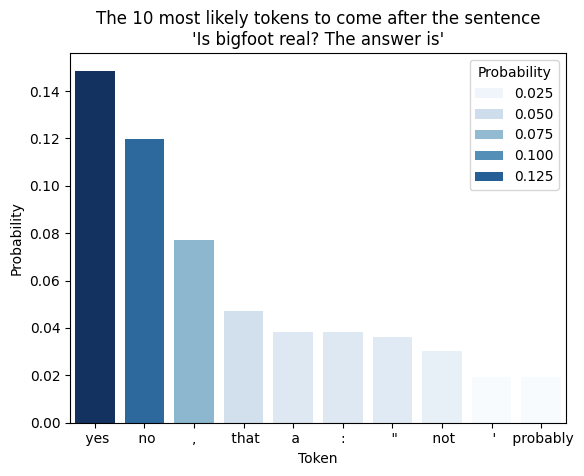

In [ ]:
input_text = "Is bigfoot real? The answer is"
top_k_tokens, top_k_probs = get_log_prob(input_text, model)
ax = plot_next_token_distribution(top_k_tokens, top_k_probs, input_text, top_k)